In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank_marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Read in the file and get basic information about the data, including numerical summaries

# A) Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [4]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [6]:
df.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [7]:
print(df.pdays.mean())

40.19782796222158


In [8]:
#its same as above
df.pdays.mean()

40.19782796222158

In [9]:
df.pdays.median()

-1.0

In [10]:
df.pdays.min()

-1

# B) Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

- From the above values we can see that, the pdays has the negative value
- pdays means, number of days that passed by after the client was last contacted from previous campaign
- But, days can not be negative so now we will take pdays values which is greater then 0 and -1

In [11]:
ndf=df[df.pdays>0]

In [12]:
ndf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [13]:
ndf.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


In [14]:
ndf.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [15]:
ndf.pdays.mean()

224.57769165556496

In [16]:
ndf.pdays.median()

194.0

# C) Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

Text(0.5, 1.0, 'Balance VS Education')

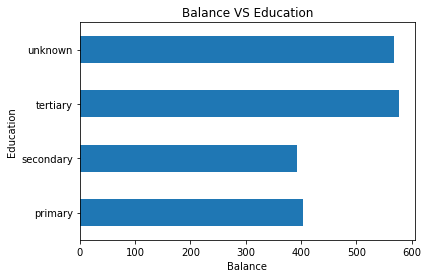

In [17]:
df.groupby(['education']).balance.median().plot.barh()
plt.xlabel('Balance')
plt.ylabel('Education')
plt.title('Balance VS Education')

Tretiary Group having higest median amoung education group

# D) Make a box plot for pdays. Do you see any outliers?

In [18]:
# checking if there are any outliers or not and we are checking this on the new data which is 'nndf' in which we have taken only
# Positive values instead of negative values

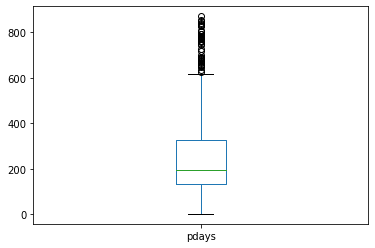

In [19]:
ndf.pdays.plot.box()
plt.show()

So, here after plotting the boxplot for the given data in pdays column, we can see that there are outliers which are above 600 or above 610

In [20]:
sum(ndf.pdays>600)

52

In [22]:
ndf[ndf.pdays>600].index

Int64Index([43034, 43368, 43404, 43507, 43586, 43727, 43848, 43884, 43887,
            43964, 43983, 44038, 44052, 44089, 44120, 44243, 44251, 44260,
            44287, 44446, 44489, 44496, 44530, 44546, 44570, 44604, 44667,
            44683, 44698, 44711, 44754, 44785, 44798, 44815, 44822, 44829,
            44832, 44837, 44840, 44858, 44864, 44865, 44906, 44924, 44960,
            44965, 44974, 45024, 45036, 45037, 45120, 45146],
           dtype='int64')

In [23]:
ndf.drop(index=ndf[ndf.pdays>600].index,inplace=True)

In [24]:
sum(ndf.pdays>600)

0

<AxesSubplot:xlabel='pdays'>

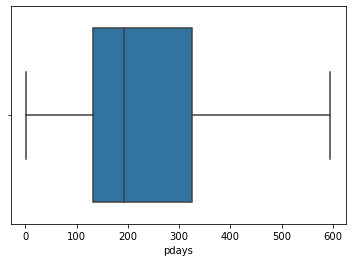

In [26]:
sns.boxplot(ndf.pdays)

Removed all the outliers from pdays

# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

# First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion

# - Convert the response variable to a convenient form

In [27]:
ndf.response.value_counts()

no     6319
yes    1886
Name: response, dtype: int64

In [28]:
ndf.response.value_counts(normalize=True)

no     0.77014
yes    0.22986
Name: response, dtype: float64

In [29]:
datamapping={'yes':1,'no':0}

In [30]:
ndf.response=ndf.response.map(datamapping)

In [32]:
ndf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [33]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8205 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8205 non-null   int64 
 1   job        8205 non-null   object
 2   salary     8205 non-null   int64 
 3   marital    8205 non-null   object
 4   education  8205 non-null   object
 5   targeted   8205 non-null   object
 6   default    8205 non-null   object
 7   balance    8205 non-null   int64 
 8   housing    8205 non-null   object
 9   loan       8205 non-null   object
 10  contact    8205 non-null   object
 11  day        8205 non-null   int64 
 12  month      8205 non-null   object
 13  duration   8205 non-null   int64 
 14  campaign   8205 non-null   int64 
 15  pdays      8205 non-null   int64 
 16  previous   8205 non-null   int64 
 17  poutcome   8205 non-null   object
 18  response   8205 non-null   int64 
dtypes: int64(9), object(10)
memory usage: 1.3+ MB


In [34]:
obj_col=[]
num_col=[]
for i in ndf.columns:
    if ndf[i].dtype=='O':
        obj_col.append(i)
    else:
        num_col.append(i)

In [35]:
print('Categorical variables:',obj_col)
print('Numeric variables:',num_col)

Categorical variables: ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numeric variables: ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


# - Make suitable plots for associations with numerical features and categorical features

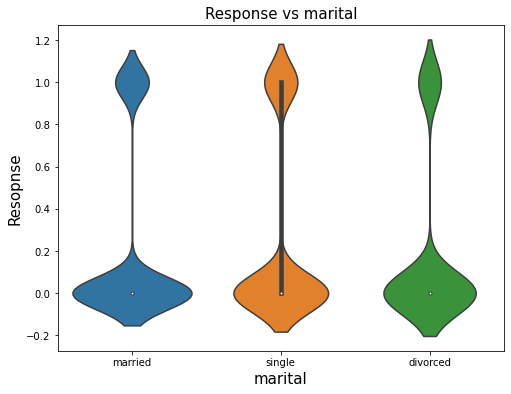

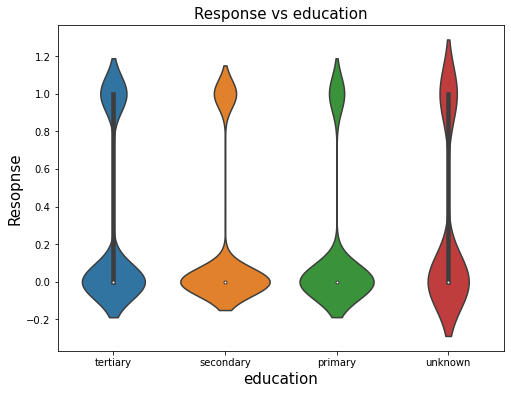

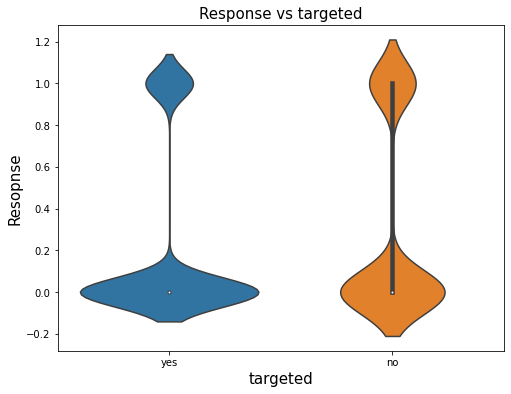

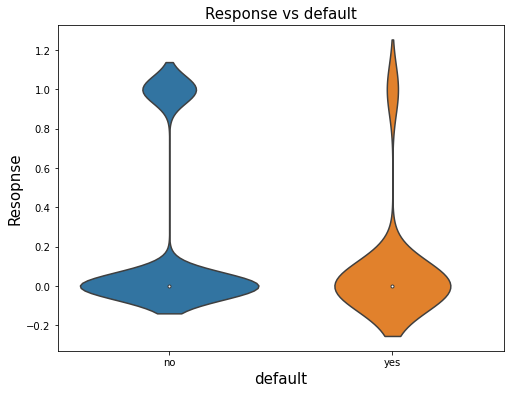

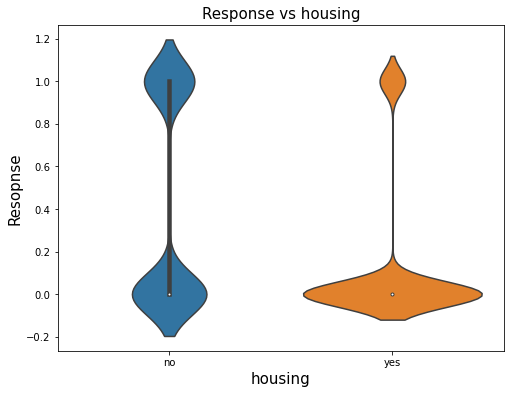

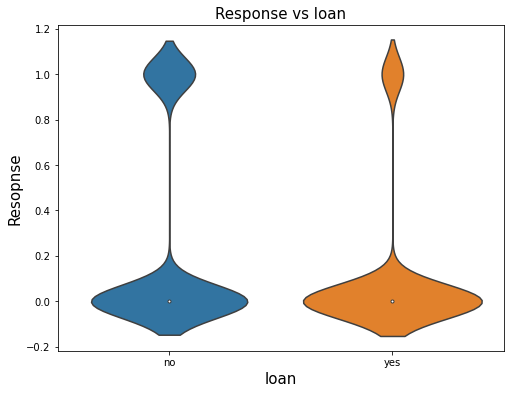

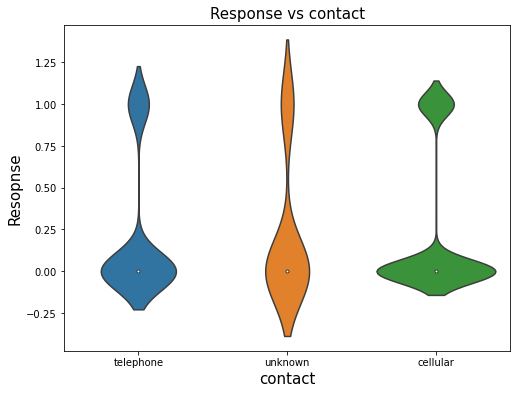

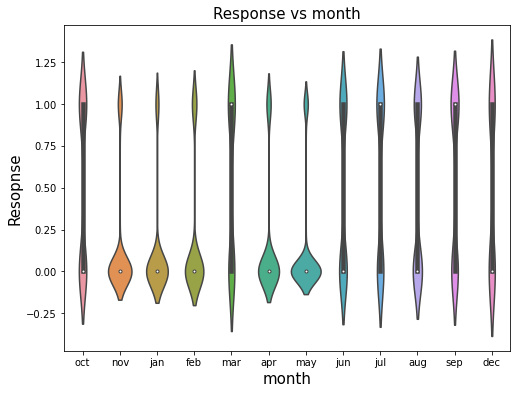

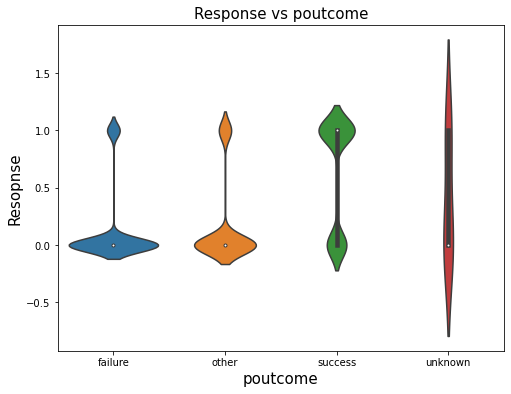

In [38]:
for i in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(ndf[i],ndf['response'])
    plt.title('Response vs '+i,fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Resopnse',fontsize=15)
    plt.show()

Text(0.5, 1.0, 'Catogerical VS Numeric')

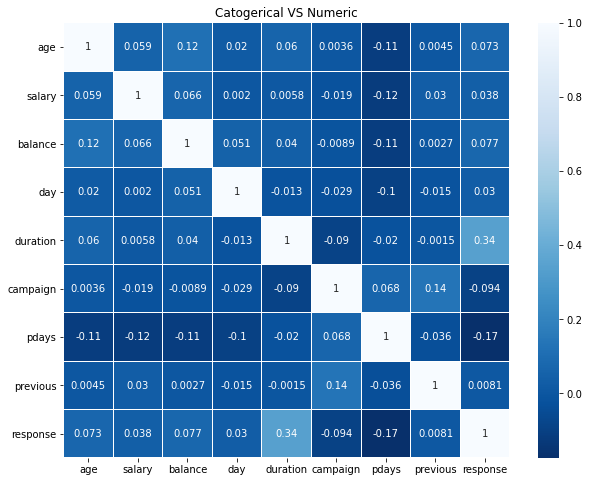

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(ndf.corr(),annot=True,cmap='Blues_r',linewidths=0.1)
plt.title('Catogerical VS Numeric')

<Figure size 576x432 with 0 Axes>

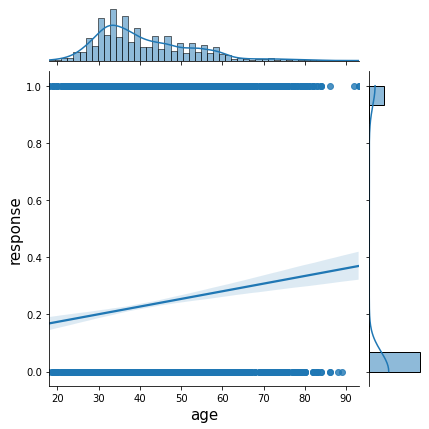

<Figure size 576x432 with 0 Axes>

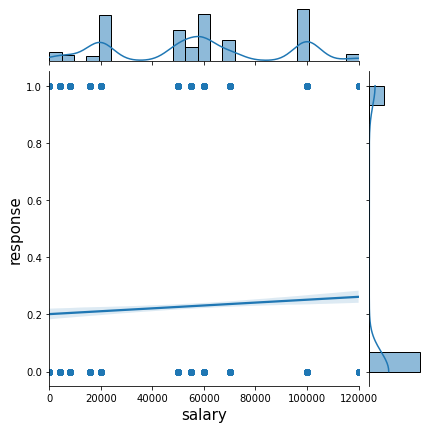

<Figure size 576x432 with 0 Axes>

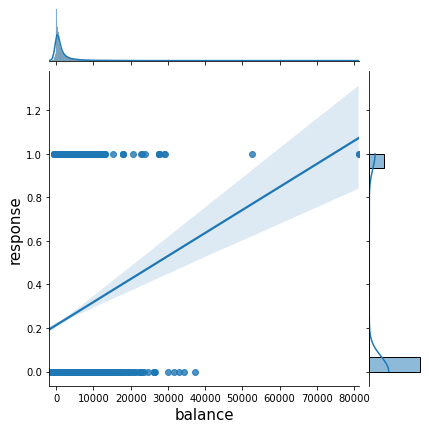

<Figure size 576x432 with 0 Axes>

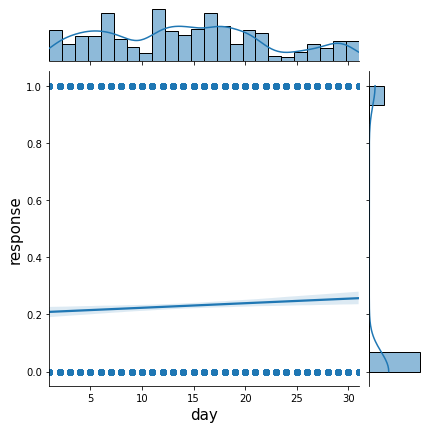

<Figure size 576x432 with 0 Axes>

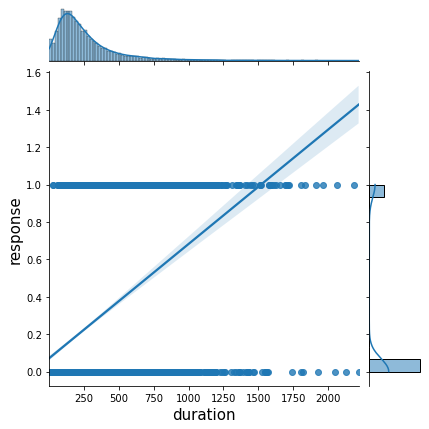

<Figure size 576x432 with 0 Axes>

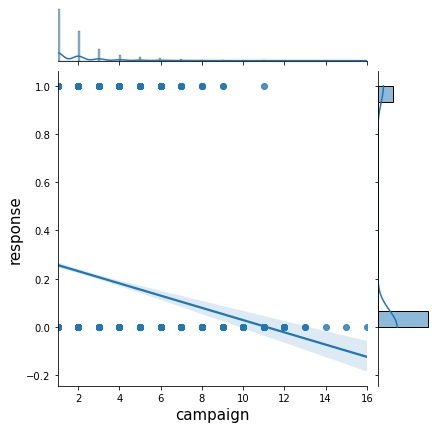

<Figure size 576x432 with 0 Axes>

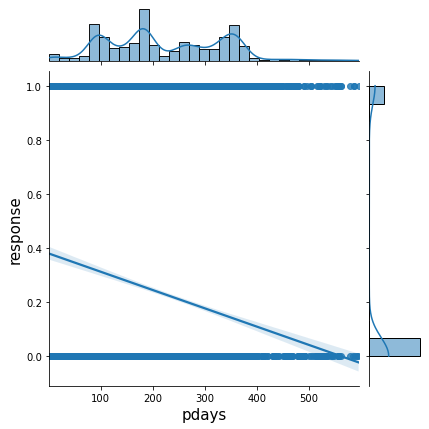

<Figure size 576x432 with 0 Axes>

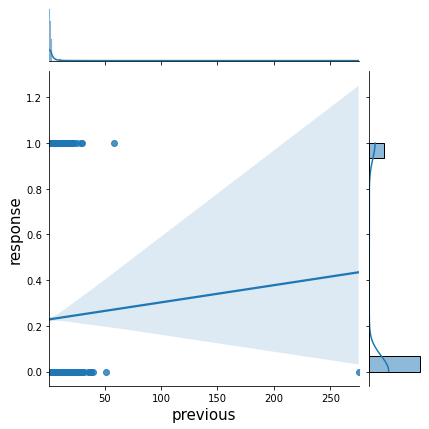

In [41]:
for i in num_col[:-1]:
    plt.figure(figsize=(8,6))
    sns.jointplot(x=ndf[i],y=ndf['response'],kind='reg')
    plt.xlabel(i,fontsize=15)
    plt.ylabel('response',fontsize=15)
    plt.show()

# Before the predictive modeling part, make sure to perform –

- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
LabelEncoder()

LabelEncoder()

In [44]:
# convert all the catogerical values into numeric using LabelEncoder
lecv=ndf[obj_col].apply(LabelEncoder().fit_transform)

In [45]:
lecv.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [46]:
num=ndf[num_col]

In [47]:
num.head()

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1


In [48]:
dfmain=lecv.join(num)

In [49]:
dfmain.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [50]:
dfmain.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072865,0.159377,-0.091083,-0.021111,-0.132182,-0.033795,0.000723,-0.002806,0.066452,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903,0.079660
marital,0.072865,1.000000,0.122070,-0.255486,-0.005753,-0.056352,-0.055374,-0.028908,-0.024663,0.045484,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519,0.049751
education,0.159377,0.122070,1.000000,-0.632761,-0.013600,-0.127906,-0.048812,-0.050515,-0.012213,0.083959,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963,0.108581
targeted,-0.091083,-0.255486,-0.632761,1.000000,0.019620,0.086574,0.070190,0.024672,0.011374,-0.071648,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387,-0.092791
default,-0.021111,-0.005753,-0.013600,0.019620,1.000000,0.022611,0.052473,-0.019521,0.020435,-0.025767,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505,-0.028256
housing,-0.132182,-0.056352,-0.127906,0.086574,0.022611,1.000000,0.112240,-0.072051,0.017032,-0.287046,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706,-0.320280
loan,-0.033795,-0.055374,-0.048812,0.070190,0.052473,0.112240,1.000000,-0.028964,-0.000715,-0.103648,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683,-0.115212
contact,0.000723,-0.028908,-0.050515,0.024672,-0.019521,-0.072051,-0.028964,1.000000,0.041944,0.024316,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374,-0.007714
month,-0.002806,-0.024663,-0.012213,0.011374,0.020435,0.017032,-0.000715,0.041944,1.000000,-0.018198,0.014876,0.018868,0.016244,-0.024655,-0.034737,0.024708,0.010131,0.012016,-0.009015
poutcome,0.066452,0.045484,0.083959,-0.071648,-0.025767,-0.287046,-0.103648,0.024316,-0.018198,1.000000,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900,0.425229


<AxesSubplot:>

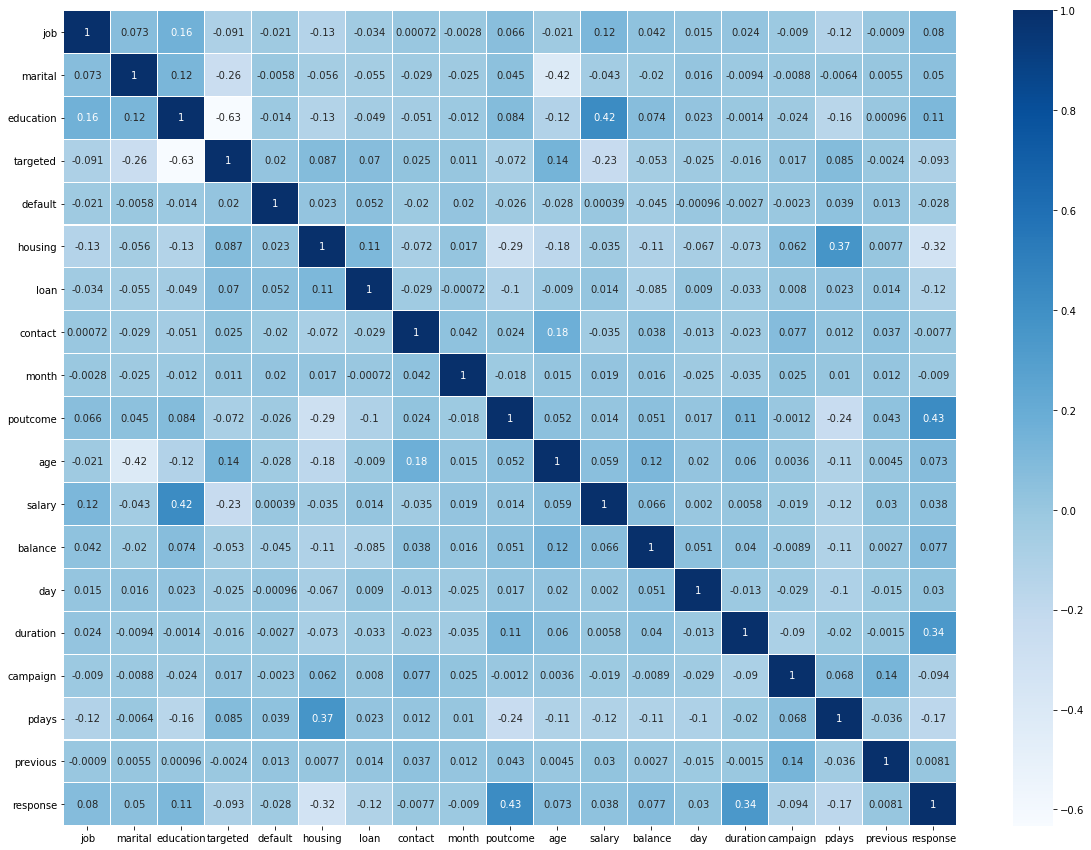

In [51]:
plt.figure(figsize=(20,15))
sns.heatmap(dfmain.corr(),annot=True,cmap='Blues',linewidths=0.1)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
dfmain.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [54]:
x=dfmain.drop('response',axis=1)
y=dfmain['response']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [65]:
x_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
26115,6,0,2,0,0,1,0,0,9,1,46,60000,926,19,168,2,153,1
39249,7,2,1,1,0,1,0,0,8,1,30,70000,177,18,187,4,356,2
44368,4,1,1,1,0,0,0,0,1,0,34,100000,369,2,868,3,342,4
35956,5,1,2,1,0,1,1,0,8,1,59,55000,148,8,685,2,366,1
44975,4,2,2,0,0,0,0,0,10,2,30,100000,502,11,463,3,95,6


In [66]:
x_test.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
41896,0,1,1,1,0,0,0,0,10,0,61,50000,1541,20,59,1,104,3
38078,1,1,0,1,0,0,0,0,8,0,48,20000,430,14,340,3,371,8
43453,1,2,3,0,0,0,0,0,0,0,35,20000,484,12,143,2,186,1
42168,9,1,1,1,0,1,0,0,9,2,24,60000,556,6,368,2,80,2
35641,4,1,2,1,0,1,0,0,8,0,31,100000,-181,8,127,1,170,2


In [67]:
y_train.head()

26115    0
39249    0
44368    1
35956    1
44975    1
Name: response, dtype: int64

In [70]:
y_test.head()

41896    0
38078    0
43453    0
42168    1
35641    0
Name: response, dtype: int64

# Predictive model 1: Logistic regression

# - Make a predictive model using logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr=LogisticRegression()

In [58]:
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_predict=lr.predict(x_test)

In [61]:
lr.score(x_test,y_test)

0.7891529555149299

In [62]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix

In [63]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1286
           1       0.54      0.18      0.27       355

    accuracy                           0.79      1641
   macro avg       0.67      0.57      0.57      1641
weighted avg       0.75      0.79      0.75      1641



In [64]:
confusion_matrix(y_predict,y_test)

array([[1230,  290],
       [  56,   65]], dtype=int64)

# - Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [71]:
from sklearn.feature_selection import RFE

In [72]:
rfe=RFE(lr,5)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [73]:
rfe.support_

array([False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False])

In [74]:
x_train.columns[rfe.support_]

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [75]:
rfetcol=x_train.columns[rfe.support_]

In [76]:
rfetcol

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

using RFE we got top 5 feature which 'education', 'default', 'housing', 'loan', 'poutcome' now we making model on that features

In [77]:
lr.fit(x_train[rfetcol],y_train)

LogisticRegression()

In [78]:
y_predrfe=lr.predict(x_test[rfetcol])

In [79]:
print(classification_report(y_predrfe,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1412
           1       0.44      0.68      0.53       229

    accuracy                           0.83      1641
   macro avg       0.69      0.77      0.71      1641
weighted avg       0.87      0.83      0.85      1641



In [80]:
confusion_matrix(y_predrfe,y_test)

array([[1212,  200],
       [  74,  155]], dtype=int64)

In [81]:
f1_score(y_predrfe,y_test)

0.5308219178082192

# Using Statsmodel

In [82]:
import statsmodels.api as sm

In [83]:
x_train[rfetcol].head()

,education,default,housing,loan,poutcome
26115,2,0,1,0,1
39249,1,0,1,0,1
44368,1,0,0,0,0
35956,2,0,1,1,1
44975,2,0,0,0,2


In [84]:
x_train_sm=sm.add_constant(x_train[rfetcol])
statsmodel=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()).fit()
statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6564
Model:                            GLM   Df Residuals:                     6558
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.9
Date:                Thu, 27 Jan 2022   Deviance:                       5685.8
Time:                        18:58:30   Pearson chi2:                 6.81e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6710      0.090    -18.647      0.000      -1.847      -1.495
education      0.2341      0.046      5.131      0.000       0.145       0.324
default       -0.4841      0.490     -0.989      0.323      -1.444       0.475
housing       -1.0822      0.068    -15.964      0.000      -1.215      -0.949
loan          -0.4938      0.116     -4.250      0.000      -0.722      -0.266
poutcome       1.0521      0.040     25.980      0.000       0.973       1.131
==============================================================================
"""

# VIF (Variance Iinflation Factor)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,age,11.76
3,targeted,6.50
2,education,6.39
16,pdays,5.80
11,salary,5.33
1,marital,4.41
13,day,4.09
8,month,3.58
5,housing,3.28
0,job,2.93


# - Estimate the model performance using k fold cross validation

In [88]:
# here we will use cross validation  to check  the score again using this technique

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=101)

cross_val_score(LogisticRegression(),x,y,cv=cv)

array([0.78915296, 0.78854357, 0.78488726, 0.77696527, 0.78671542])

after performing cross validationwe got score and it is 78%

# - What is the precision, recall, accuracy of your model

In [89]:
from sklearn.metrics import classification_report

In [90]:
 print(classification_report(y_test,y_predrfe))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1286
           1       0.68      0.44      0.53       355

    accuracy                           0.83      1641
   macro avg       0.77      0.69      0.71      1641
weighted avg       0.82      0.83      0.82      1641



# - Which features are the most important from your model

In [120]:
rfetcol

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

'Education' , 'Default' ,' Housing' , 'Loan' , 'Poutcome' is most imp feature in our model

# Predictive model 2: Random Forest

# - Make a predictive model using random forest technique

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

# - Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [96]:
RF=RandomForestClassifier(max_depth=5,n_estimators=42)

In [97]:
RF

RandomForestClassifier(max_depth=5, n_estimators=42)

In [99]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=42)

In [101]:
y_pred_RF=RF.predict(x_test)

In [102]:
y_pred_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
RF.score(x_test,y_test)

0.8494820231566118

In [104]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1286
           1       0.74      0.47      0.57       355

    accuracy                           0.85      1641
   macro avg       0.80      0.71      0.74      1641
weighted avg       0.84      0.85      0.84      1641



# - Estimate the model performance using k fold cross validation

In [105]:
# here we will use cross validation  to check  the score again using this technique

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=101)

cross_val_score(RandomForestClassifier(),x,y,cv=cv)

array([0.85496648, 0.85313833, 0.84399756, 0.84887264, 0.85984156])

# - What is the precision, recall, accuracy of your model

In [106]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1286
           1       0.74      0.47      0.57       355

    accuracy                           0.85      1641
   macro avg       0.80      0.71      0.74      1641
weighted avg       0.84      0.85      0.84      1641



# - Using the feature importance values from the Random Forest module, identify the most important features for the model

In [109]:
from sklearn.feature_selection import RFE

In [111]:
rfe1=RFE(RF,5)

In [112]:
rfe1.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, n_estimators=42),
    n_features_to_select=5)

In [113]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [114]:
x_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [116]:
topcols=x_train.columns[rfe1.support_]

In [117]:
topcols

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

 'Housing', 'Month', 'Poutcome', 'Duration', 'Pdays' is most imp feature for Random Forest module

# Compare the performance of the Random Forest and the logistic model –

- Evaluate both models on the test set
- Which metric did you choose and why
- Which model has better performance on the test set

In [118]:
# accuracy score for Logestic Regression model
print(classification_report(y_test,y_predrfe))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1286
           1       0.68      0.44      0.53       355

    accuracy                           0.83      1641
   macro avg       0.77      0.69      0.71      1641
weighted avg       0.82      0.83      0.82      1641



In [119]:
# accuracy score for Random forest model
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1286
           1       0.74      0.47      0.57       355

    accuracy                           0.85      1641
   macro avg       0.80      0.71      0.74      1641
weighted avg       0.84      0.85      0.84      1641



on the basis of prediction model Random forest is better beacuse it gives the better accuracy_score thats why i choose this model

- Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

In [121]:
# best features after performing RFE on Logistic Regression
rfetcol

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [122]:
# best features after performing RFE on Random forest
topcols

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

- As we can see above the best features for both the models are different and each model is giving importance to different different features
- But, there are some features which are common in both the models